# Data Analysis

Data analysis is the process of examining, cleaning, transforming, and modeling data to extract meaningful information, draw conclusions, and support decision-making. Key steps in data analysis include:

### 1. Exploratory Data Analysis (EDA)
EDA involves understanding the structure of the data, discovering patterns, and identifying important features using techniques such as data visualization and summary statistics.

### 2. Data Cleaning and Preprocessing
This step involves inspecting the dataset to identify and handle missing, inconsistent, or outlier data. It includes correcting or removing erroneous data to improve data quality.

### 3. Basic Statistical Analysis
Basic statistical analysis examines the dataset's fundamental statistical properties, such as mean, standard deviation, median, and mode, to understand central tendencies and distribution.

### 4. Visualization
Data visualization uses tools like matplotlib and seaborn to create charts, histograms, box plots, and scatter plots, helping to visually understand patterns and relationships in the data.

### 5. Analysis of Variable Relationships
Analyzing relationships between variables using techniques like correlation analysis helps identify significant variables and their interactions.

#### 5.1. Feature Selection
Feature selection reduces the number of variables in a dataset to improve model performance and reduce complexity. It includes filtering methods (based on statistical measures) and wrapping methods (using specific models to select features).

### 6. Feature Engineering
Feature engineering involves creating new features or modifying existing ones to enhance the dataset's representation for better modeling and results. It also includes detecting and handling outliers and missing data.

By following these steps, data analysis transforms raw data into actionable insights, supporting effective decision-making and improved outcomes.


#Lets start.
First, we need to import some libraries.

In [117]:
import warnings
import os

import numpy as np  # NumPy for numerical computing
import pandas as pd  # Pandas for data manipulation and analysis

# Data visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

warnings.simplefilter(action='ignore', category=Warning)

# Some Pandas settings
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.width', 500)

# Exploratory Data Analysis (EDA) Section
Exploratory Data Analysis (EDA) is a crucial step in data analysis where datasets are visually and statistically analyzed to uncover patterns, trends, and relationships within the data. Through techniques like data visualization and summary statistics, EDA aims to understand the structure of the data, identify potential outliers or missing values, and gain insights that inform further analysis or modeling decisions.

Let's continue on EDA section with reading .csv file.

In [118]:
df = pd.read_csv("heart_statlog_cleveland_hungary_final.csv")

To have some basic information on csv file, we are going to use those methods.

In [119]:
def check_df(dataframe):
    print("##################### Row and Column Count #####################")
    print(dataframe.shape)
    print("\n##################### Column Names #####################")
    print(dataframe.columns)
    print("\n##################### First Five Rows #####################")
    print(dataframe.head())
    print("\n##################### Last Five Rows #####################")
    print(dataframe.tail())
    print("\n##################### DataFrame Information #####################")
    dataframe.info()
    print("\n##################### Data Types #####################")
    print(dataframe.dtypes)


check_df(df)

##################### Row and Column Count #####################
(1190, 12)

##################### Column Names #####################
Index(['age', 'sex', 'chest pain type', 'resting bp s', 'cholesterol', 'fasting blood sugar', 'resting ecg', 'max heart rate', 'exercise angina', 'oldpeak', 'ST slope', 'target'], dtype='object')

##################### First Five Rows #####################
   age  sex  chest pain type  resting bp s  cholesterol  fasting blood sugar  resting ecg  max heart rate  exercise angina  oldpeak  ST slope  target
0   40    1                2           140          289                    0            0             172                0    0.000         1       0
1   49    0                3           160          180                    0            0             156                0    1.000         2       1
2   37    1                2           130          283                    0            1              98                0    0.000         1       0
3   48   

To have some statistical information, we are going to use .describe() method. ".T" means we will transpose the data., for better readability.

In [120]:
print(df.describe().T)

                       count    mean     std    min     25%     50%     75%     max
age                 1190.000  53.720   9.358 28.000  47.000  54.000  60.000  77.000
sex                 1190.000   0.764   0.425  0.000   1.000   1.000   1.000   1.000
chest pain type     1190.000   3.233   0.935  1.000   3.000   4.000   4.000   4.000
resting bp s        1190.000 132.154  18.369  0.000 120.000 130.000 140.000 200.000
cholesterol         1190.000 210.364 101.420  0.000 188.000 229.000 269.750 603.000
fasting blood sugar 1190.000   0.213   0.410  0.000   0.000   0.000   0.000   1.000
resting ecg         1190.000   0.698   0.870  0.000   0.000   0.000   2.000   2.000
max heart rate      1190.000 139.733  25.518 60.000 121.000 140.500 160.000 202.000
exercise angina     1190.000   0.387   0.487  0.000   0.000   0.000   1.000   1.000
oldpeak             1190.000   0.923   1.086 -2.600   0.000   0.600   1.600   6.200
ST slope            1190.000   1.624   0.610  0.000   1.000   2.000   2.000 

The code snippet below defines a function plot_numerical_col to generate histograms for numerical columns in a DataFrame. It then selects all columns in the DataFrame and plots histograms for each selected column using the defined function. This allows for a concise visual analysis of the distribution of numerical data across the DataFrame.

To make the visual data more clear, I also provide some information in writing here.


| Column                      | Description                                                                                                 |
|-----------------------------|-------------------------------------------------------------------------------------------------------------|
| Sex                         | 1 = Male, 0 = Female                                                                                        |
| Chest Pain Type             | -- Value 1: typical angina<br>-- Value 2: atypical angina<br>-- Value 3: non-anginal pain<br>-- Value 4: asymptomatic |
| Fasting Blood Sugar         | Fasting blood sugar > 120 mg/dl (1 = true; 0 = false)                                                       |
| Resting ECG Results         | -- Value 0: normal<br>-- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)<br>-- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria |
| Exercise Induced Angina     | 1 = yes; 0 = no                                                                                            |
| Slope of Peak Exercise ST Segment | -- Value 1: upsloping<br>-- Value 2: flat<br>-- Value 3: downsloping                                              |
| Class                       | 1 = heart disease, 0 = Normal                                                                               |


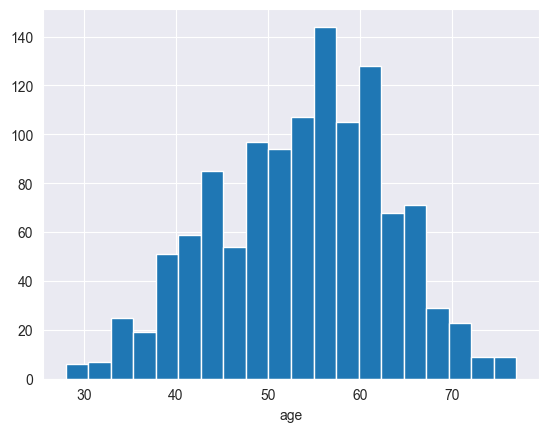

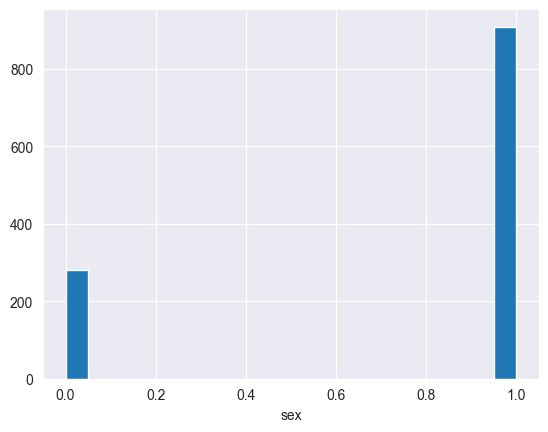

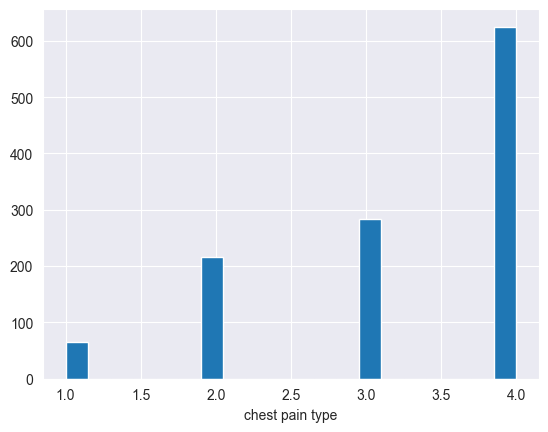

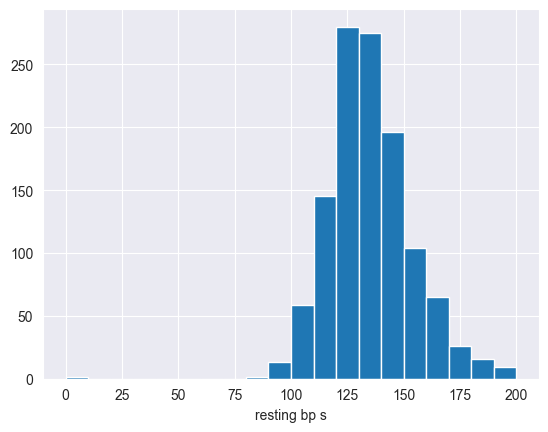

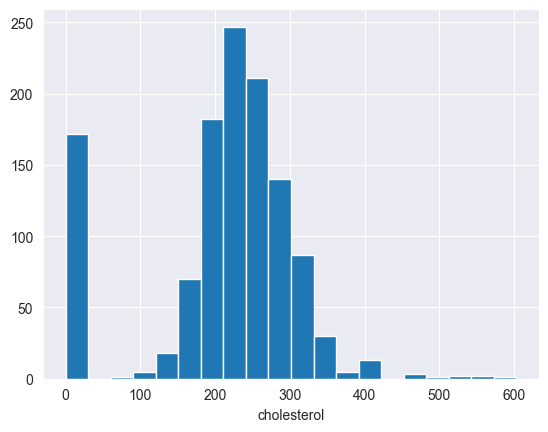

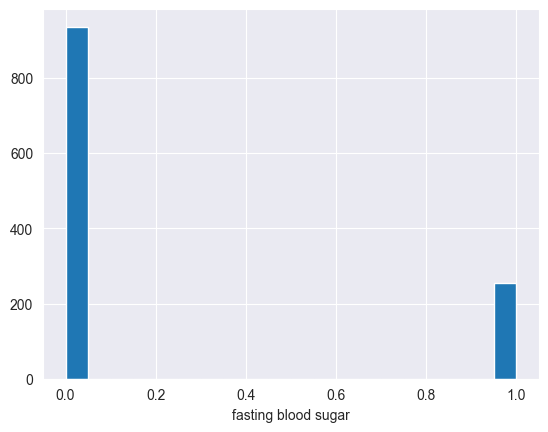

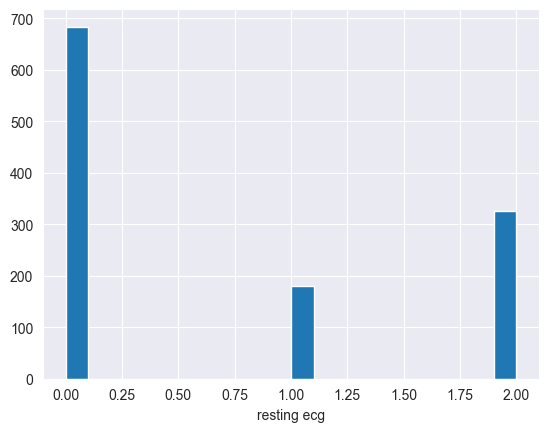

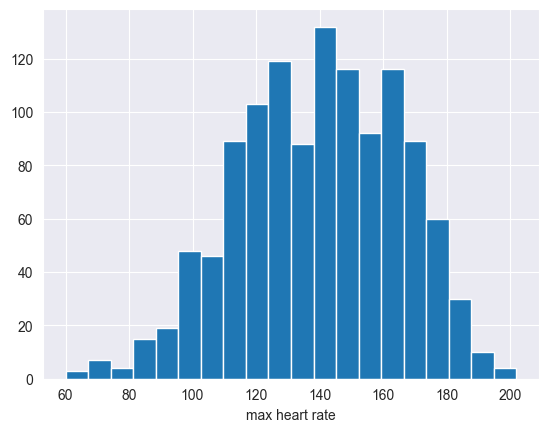

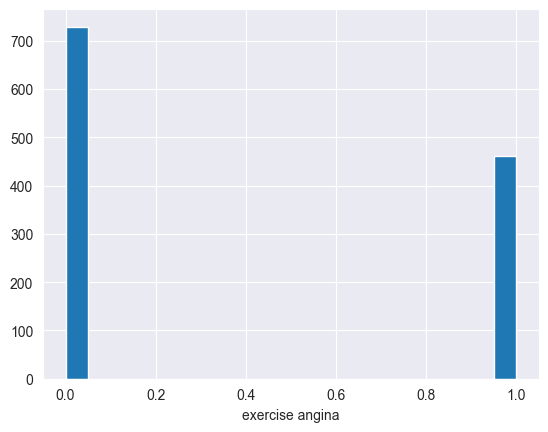

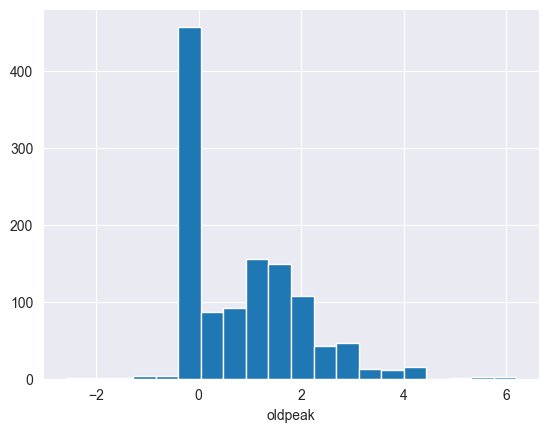

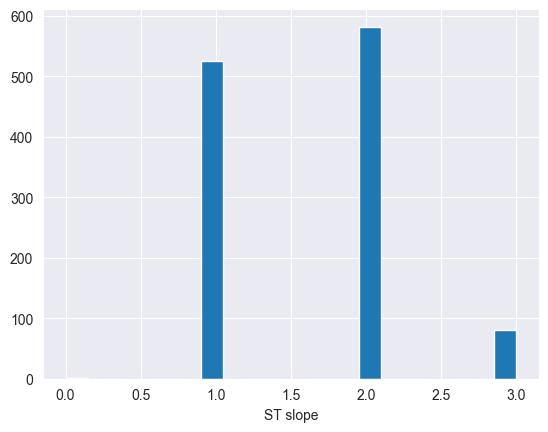

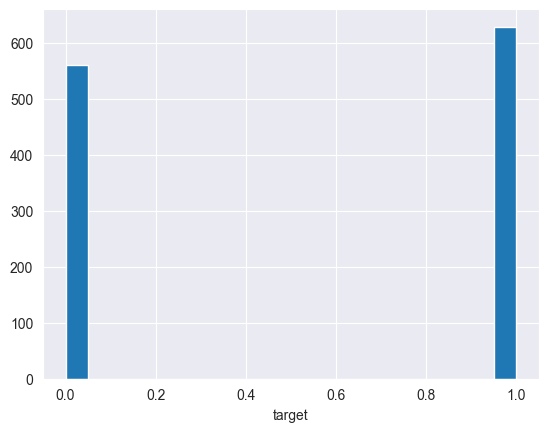

In [121]:
def plot_numerical_col(dataframe, numerical_col):
    dataframe[numerical_col].hist(bins=20)
    plt.xlabel(numerical_col)
    plt.show(block=True)

cols = [col for col in df.columns]

for col in cols:
    plot_numerical_col(df, col)

To have a percentage look for every column:

In [122]:
for col in cols:
    print(f"\n{col} Value Counts (%):")
    print(100 * df[col].value_counts() / len(df))


age Value Counts (%):
age
54   5.630
58   4.874
57   4.202
52   3.950
55   3.950
59   3.950
56   3.950
51   3.950
62   3.866
60   3.697
53   3.361
48   3.193
61   3.193
63   3.109
41   2.773
50   2.689
64   2.605
43   2.605
46   2.605
44   2.437
65   2.437
49   2.269
42   2.185
45   2.101
67   1.933
47   1.933
66   1.597
39   1.513
38   1.429
69   1.345
40   1.345
35   1.176
37   1.092
68   1.092
70   0.924
34   0.756
74   0.672
71   0.672
36   0.504
32   0.420
72   0.336
29   0.336
77   0.252
75   0.252
76   0.252
33   0.168
31   0.168
30   0.084
28   0.084
73   0.084
Name: count, dtype: float64

sex Value Counts (%):
sex
1   76.387
0   23.613
Name: count, dtype: float64

chest pain type Value Counts (%):
chest pain type
4   52.521
3   23.782
2   18.151
1    5.546
Name: count, dtype: float64

resting bp s Value Counts (%):
resting bp s
120   13.950
130   12.521
140   11.513
110    6.387
150    6.134
       ...  
185    0.084
98     0.084
92     0.084
113    0.084
164    0.084
Name: c

We have completed EDA section, so let's continue with data preprocessing section.

# Data Cleaning and Preprocessing Section

Data preprocessing is the initial step in data analysis, involving the transformation of raw data into a clean and organized format suitable for further analysis. This process typically includes tasks such as handling missing values, removing duplicates, scaling features, encoding categorical variables, and feature engineering. Data preprocessing aims to improve data quality, enhance model performance, and ensure that the data meets the requirements of the analytical techniques to be applied. By addressing inconsistencies and preparing the data appropriately, data preprocessing facilitates more accurate and meaningful insights during subsequent analysis tasks, such as machine learning modeling or statistical analysis.

First, we are going to take a look if there is any missing data.

"df.isnull().sum()" counts the total number of missing values in each column of a DataFrame. It returns a series where each column name corresponds to its count of missing values.

In [123]:
print(df.isnull().sum())

age                    0
sex                    0
chest pain type        0
resting bp s           0
cholesterol            0
fasting blood sugar    0
resting ecg            0
max heart rate         0
exercise angina        0
oldpeak                0
ST slope               0
target                 0
dtype: int64


Belong to results, there is no missing data on our dataset.

So now, we are going to check and replace our outliers. Outliers basically means noises of our dataset. Those noises do not represenst main number patters of our datas. For example, pragnancies datas can not be more than 9 month or lower than 0 month. Thant means our pragnacies range is 0-9. We should exclude the datas not in our range. To exclude those outlier noises, we are going to implement two function named “check_outlier” and “outlier_tresholds”.

The first function, outlier_thresholds, calculates lower and upper limits for identifying outliers in a numerical column of a DataFrame based on quartiles and interquartile range. The second function, check_outlier, checks for outliers in a column using the limits obtained from the first function, returning True if any outliers are found, and False otherwise.

In [124]:
def outlier_thresholds(dataframe, col_name, q1=0.05, q3=0.95):
    
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

def check_outlier(dataframe, col_name):
    
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False
    
for col in cols:
    # Look for every column
    print(col, check_outlier(df, col))

age False
sex False
chest pain type False
resting bp s True
cholesterol False
fasting blood sugar False
resting ecg False
max heart rate False
exercise angina False
oldpeak False
ST slope False
target False


According to results, Only “resting bp s” column has an outlier.

Then, let’s replace the outliers in the Insulin column with our range limits which will be calculated in the function below. If outlier variable higher than up_limit, replace it with up_limit. Else if outlier variable lower than low_limit, replace it with low_limit.

In [125]:
def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

replace_with_thresholds(df, "resting bp s")

Let's check if the outliers are removed.

In [126]:
for col in cols:
    print(col, check_outlier(df, col))

age False
sex False
chest pain type False
resting bp s False
cholesterol False
fasting blood sugar False
resting ecg False
max heart rate False
exercise angina False
oldpeak False
ST slope False
target False


Obviously, outlier datas removed.

# Basic Statistical Analysis Section

Basic statistical analysis involves summarizing, visualizing, and interpreting data to understand its main characteristics and relationships. Key components include:

**Descriptive Statistics:**

Mean: The average value.
Median: The middle value.
Mode: The most frequent value.
Standard Deviation: Measures data dispersion.

**Distribution Analysis:**

Histogram: Visualizes data distribution.
Boxplot: Shows quartiles, median, and outliers.

Let's look at them.

In [127]:
print("\n##################### Mean #####################")
print(df.mean())

# Standart Sapma (Standard Deviation)
print("\n##################### Standard Deviation #####################")
print(df.std())

# Medyan (Median)
print("\n##################### Median #####################")
print(df.median())

# Mod (Mode)
print("\n##################### Mode #####################")
print(df.mode().iloc[0])

# İstatistiksel Özet (Summary Statistics)
print("\n##################### Summary Statistics #####################")
print(df.describe(include='all'))


##################### Mean #####################
age                    53.720
sex                     0.764
chest pain type         3.233
resting bp s          132.175
cholesterol           210.364
fasting blood sugar     0.213
resting ecg             0.698
max heart rate        139.733
exercise angina         0.387
oldpeak                 0.923
ST slope                1.624
target                  0.529
dtype: float64

##################### Standard Deviation #####################
age                     9.358
sex                     0.425
chest pain type         0.935
resting bp s           18.231
cholesterol           101.420
fasting blood sugar     0.410
resting ecg             0.870
max heart rate         25.518
exercise angina         0.487
oldpeak                 1.086
ST slope                0.610
target                  0.499
dtype: float64

##################### Median #####################
age                    54.000
sex                     1.000
chest pain type         

To visualize and see central tendency using mean, median and mode:

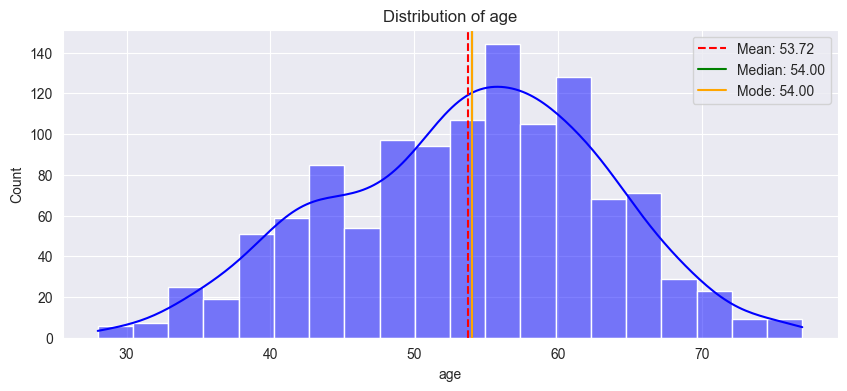

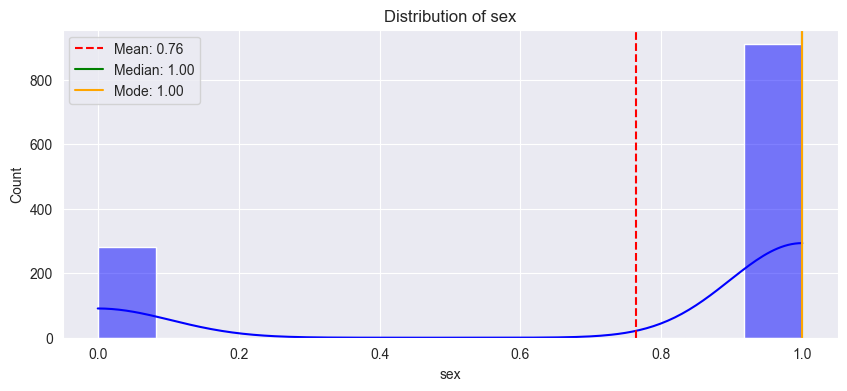

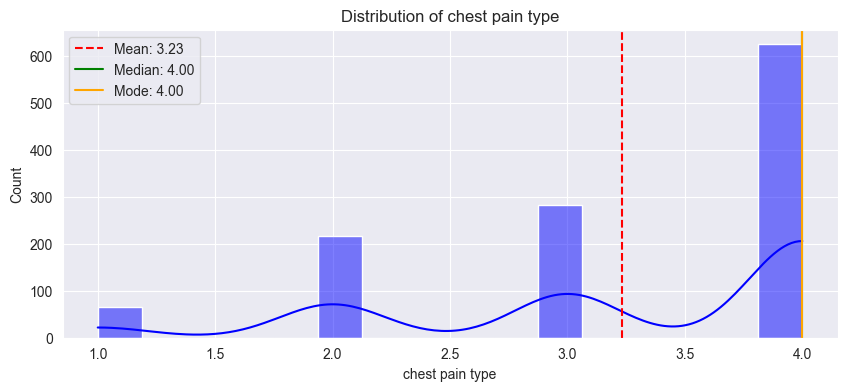

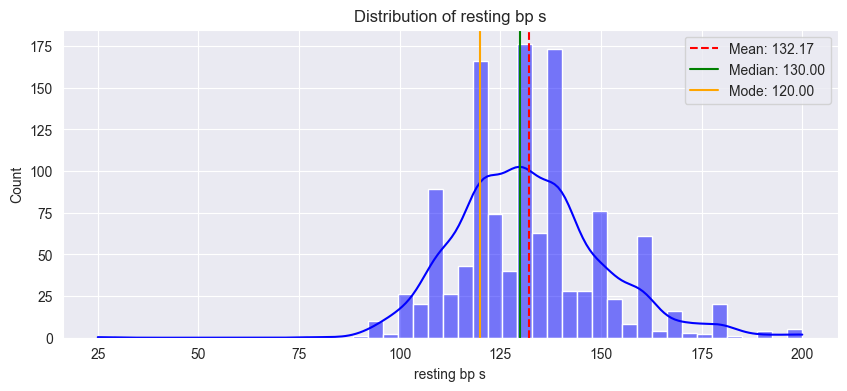

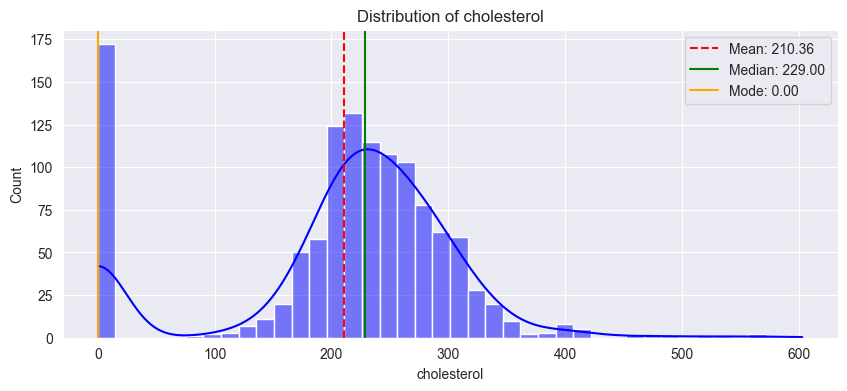

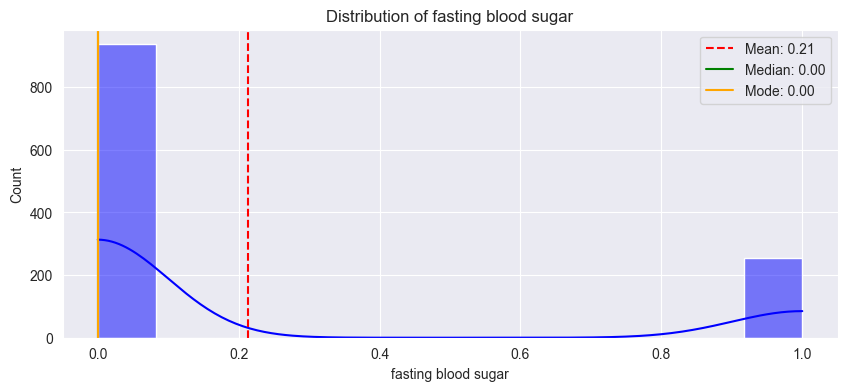

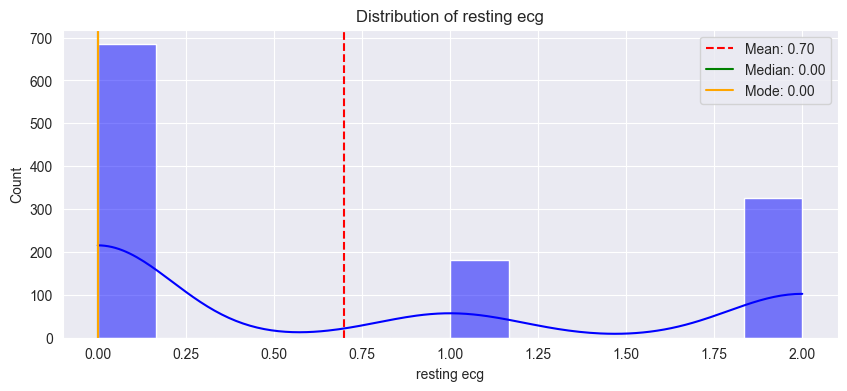

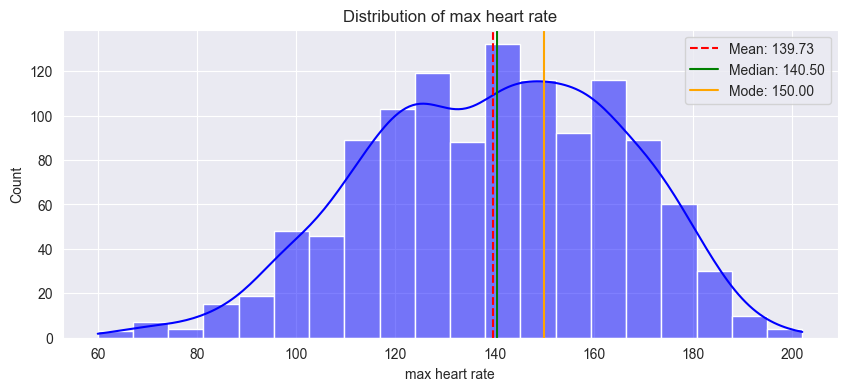

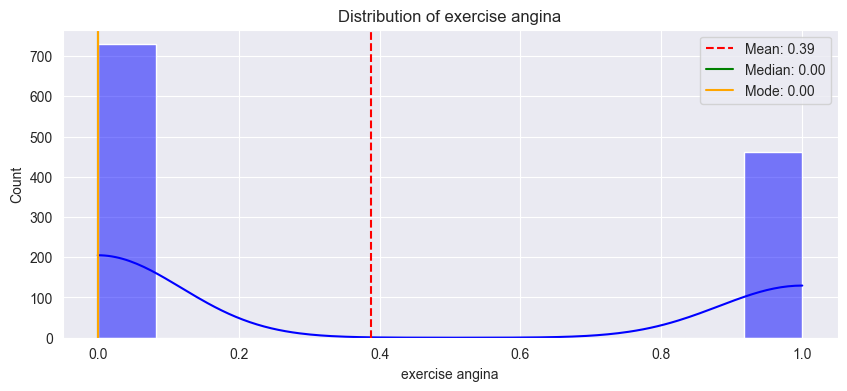

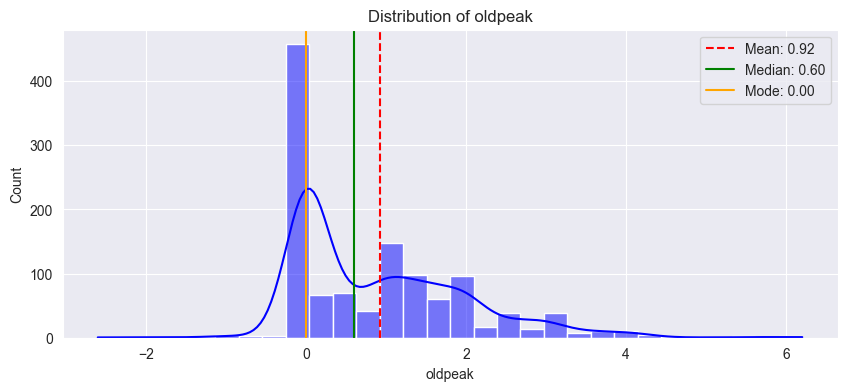

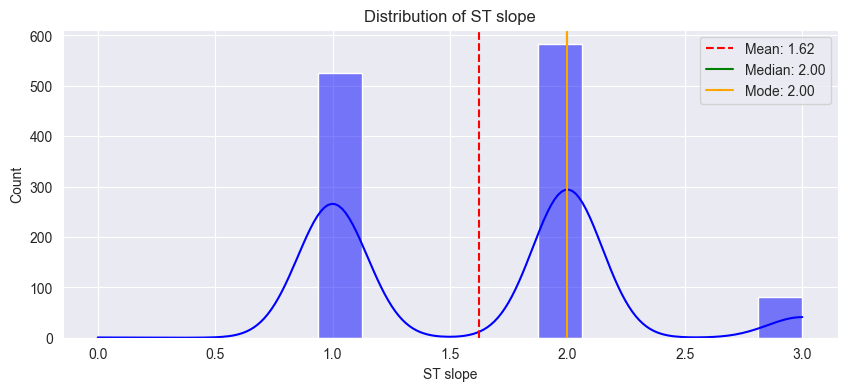

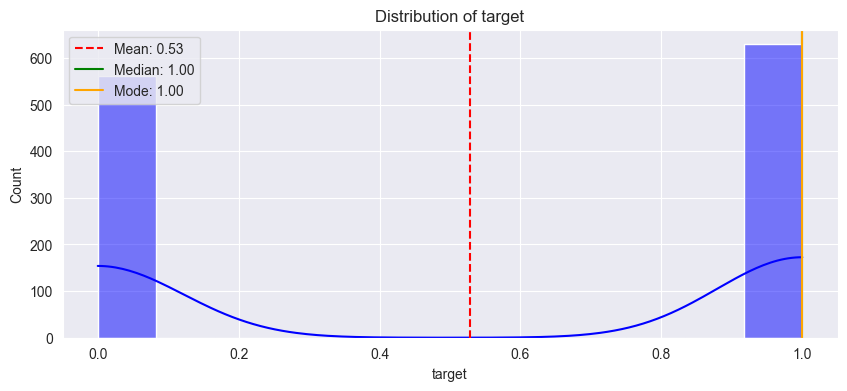

In [128]:
#Get mean, median and mode to 
mean_values = df.mean()
median_values = df.median()
mode_values = df.mode().iloc[0]

for column in df.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(10, 4))
    sns.histplot(df[column], kde=True, color='blue')
    plt.axvline(mean_values[column], color='red', linestyle='--', label=f'Mean: {mean_values[column]:.2f}')
    plt.axvline(median_values[column], color='green', linestyle='-', label=f'Median: {median_values[column]:.2f}')
    plt.axvline(mode_values[column], color='orange', linestyle='-', label=f'Mode: {mode_values[column]:.2f}')
    plt.title(f'Distribution of {column}')
    plt.legend()
    plt.show()

# Data Visualization Section

Data visualization is the graphical representation of information and data. By using visual elements like charts, graphs, and maps, data visualization tools provide an accessible way to see and understand trends, outliers, and patterns in data. Additionally, it provides an excellent way for employees or business owners to present data to non-technical audiences without confusion.

### As a first example, we can give the first code we wrote above.

Then, we can continue with other visualization techniques.

In our project, we are going to use these libraries to visualize our dataset.

In [129]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

Let's go with Seaborn. We can basicly create scatter plots using sns.scatterplot for each numerical column. The x-axis represents the index of the DataFrame, and the y-axis represents the values of the column.

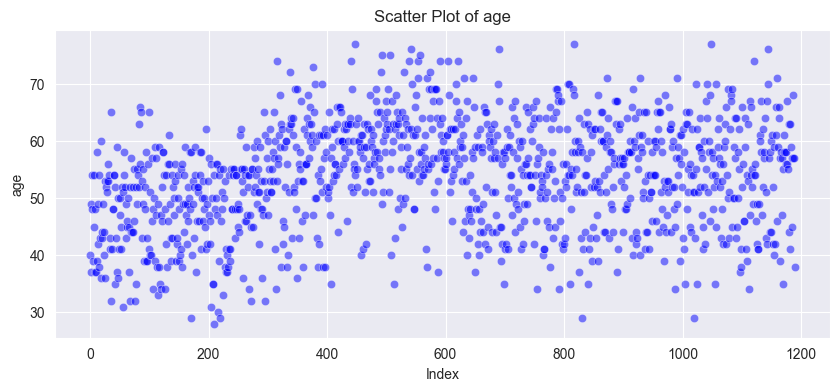

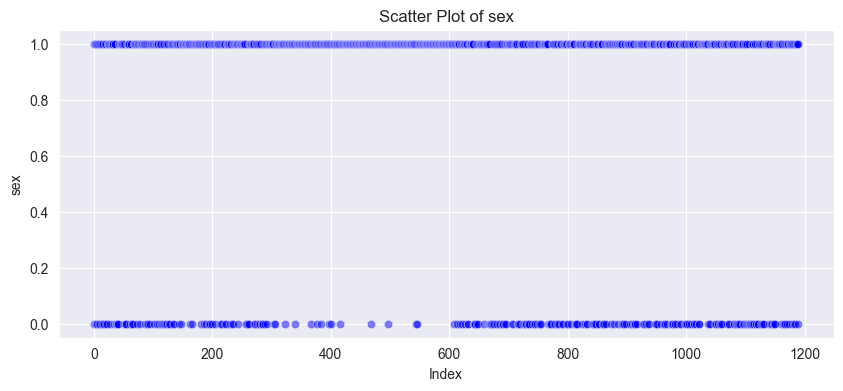

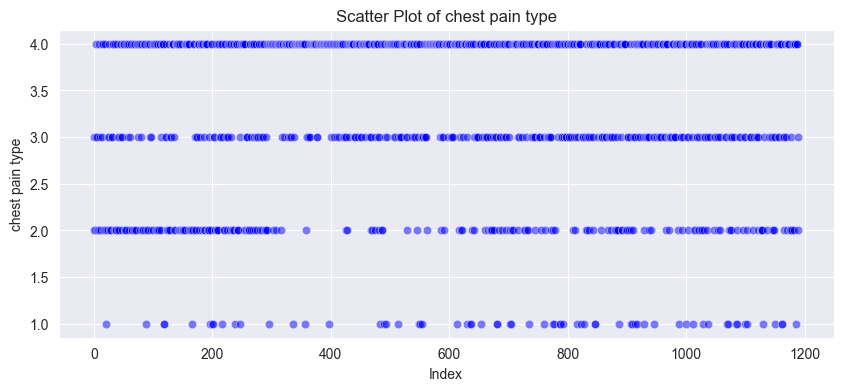

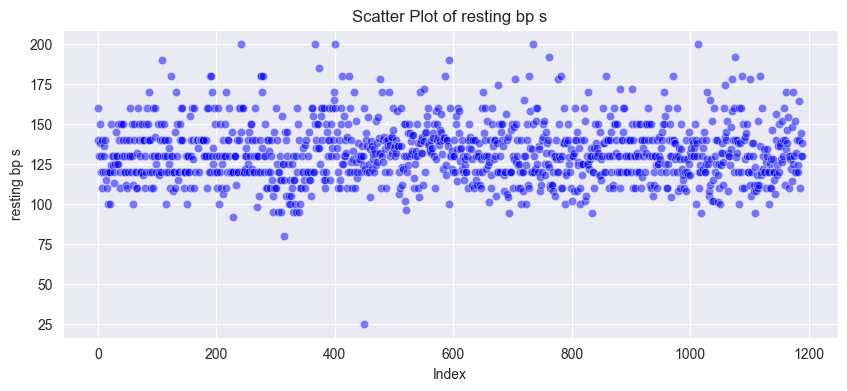

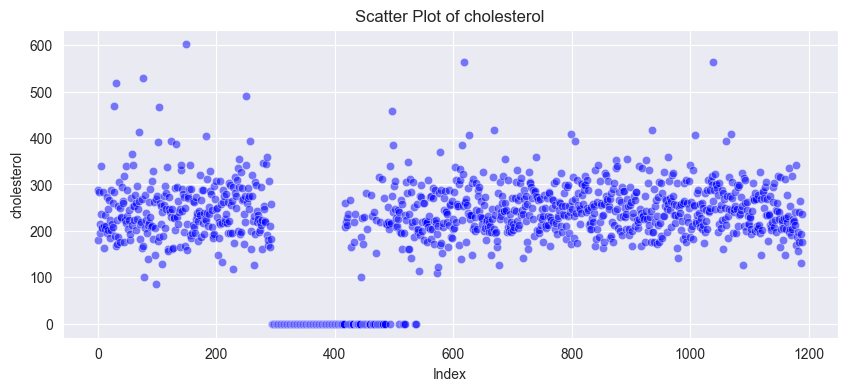

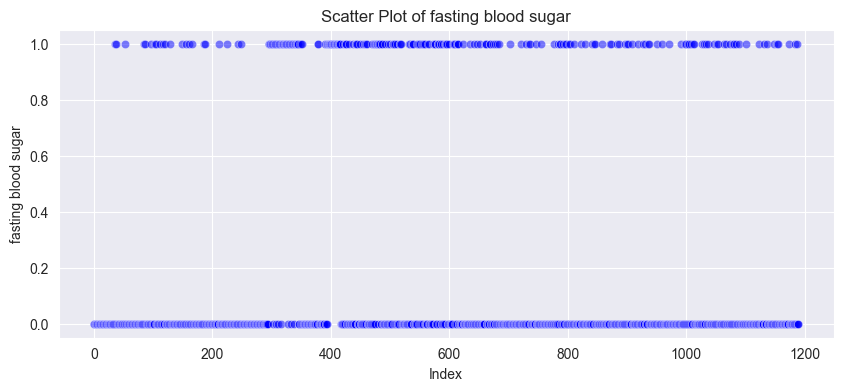

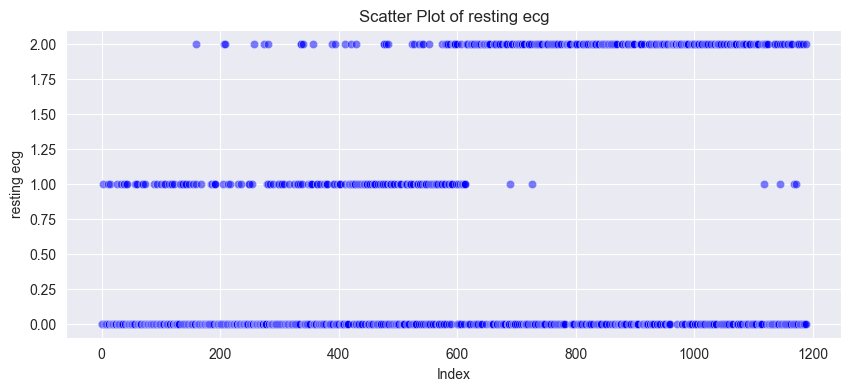

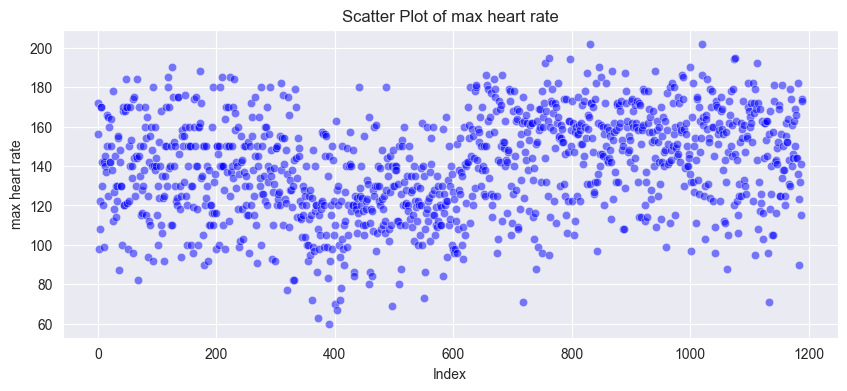

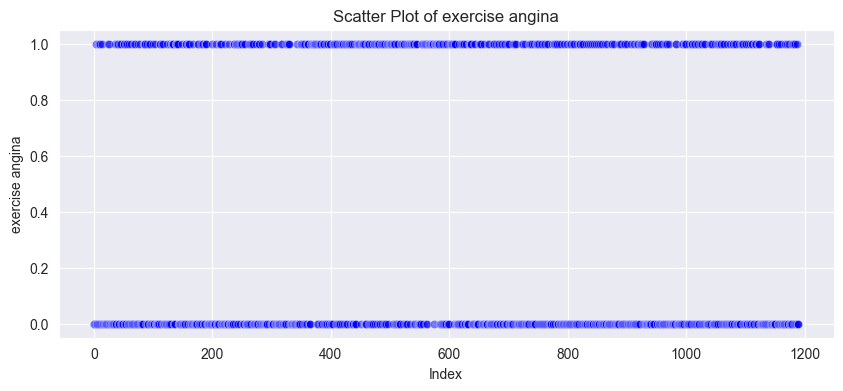

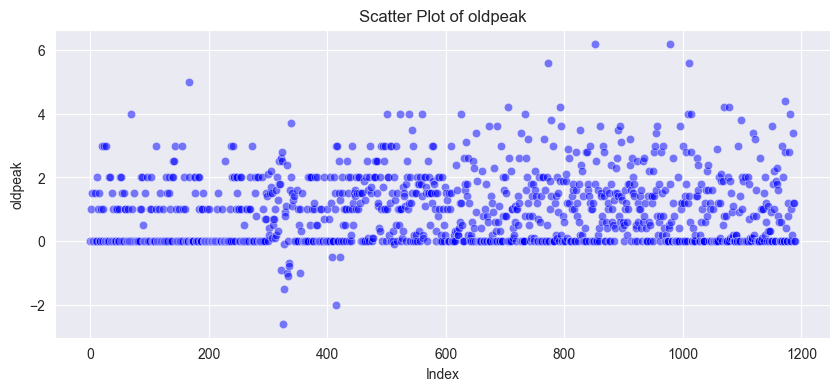

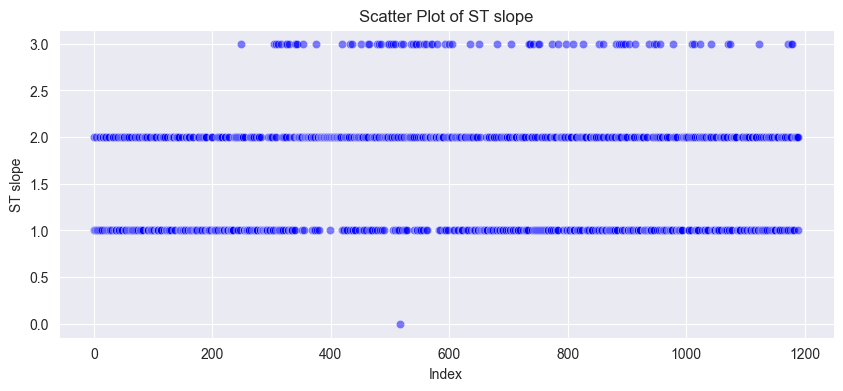

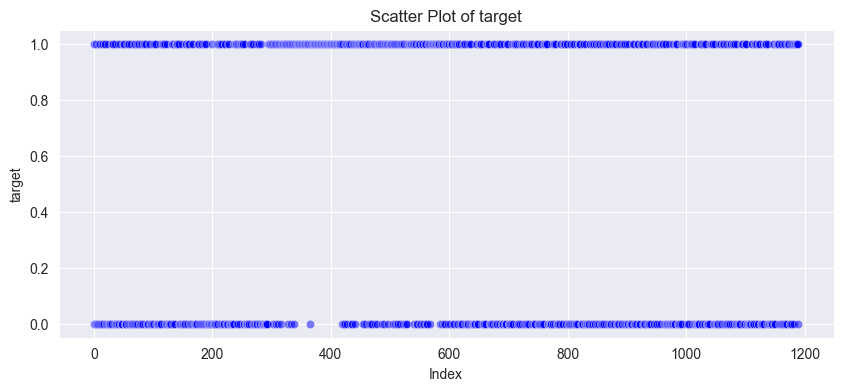

In [136]:
for column in df.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(10, 4))
    sns.scatterplot(x=df.index, y=df[column], alpha=0.5, color='blue')
    
    plt.title(f'Scatter Plot of {column}')
    plt.xlabel('Index')
    plt.ylabel(column)
    plt.show()


As third example, we can create a histogram for each numeric column.
It enriches the histogram with Kernel Density Estimate (KDE).
Histogram helps visualize the distribution of data.

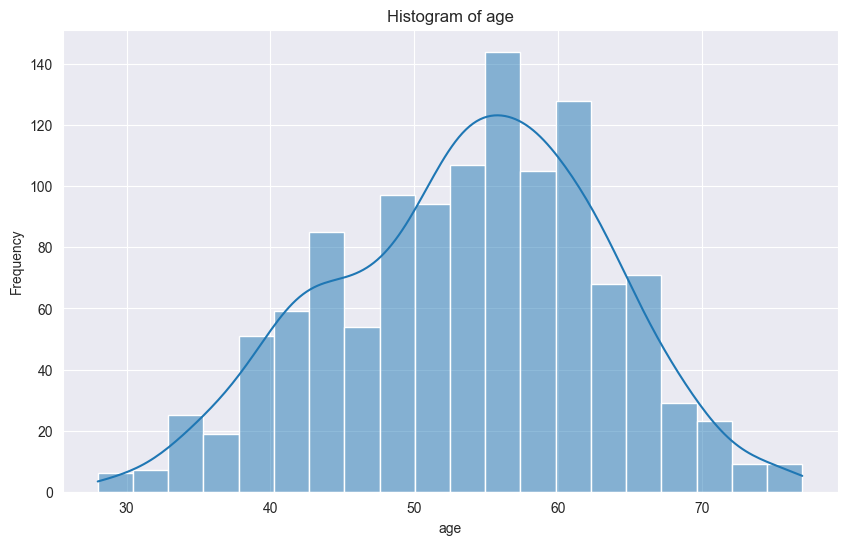

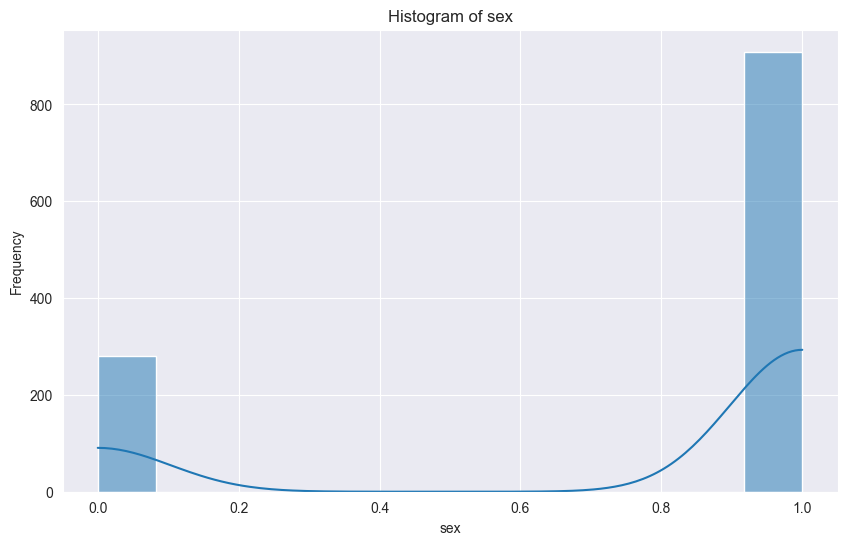

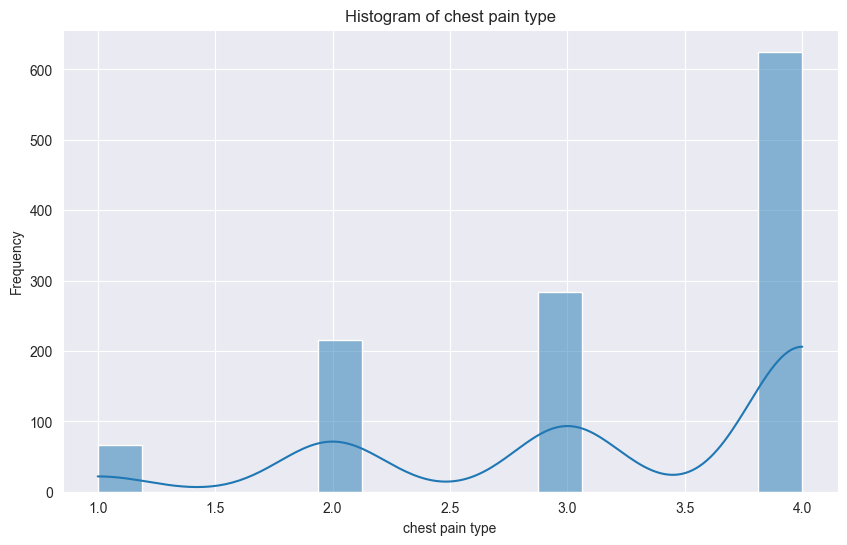

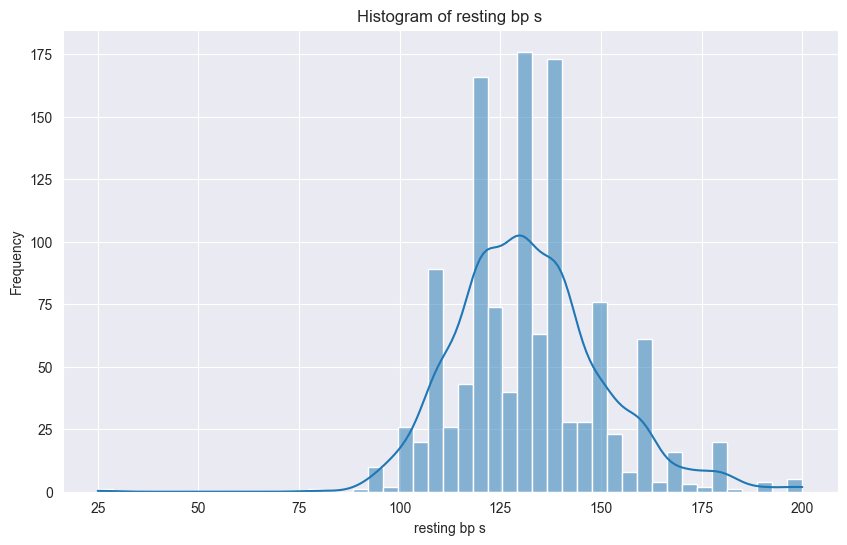

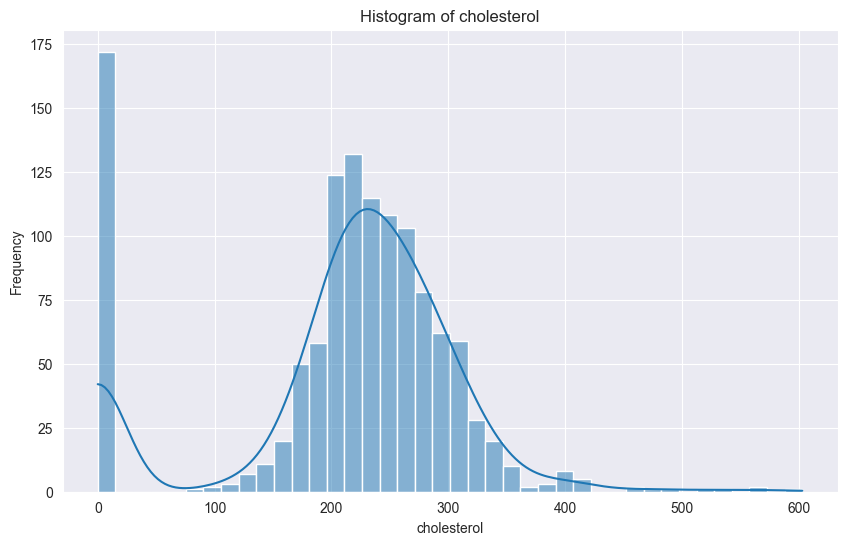

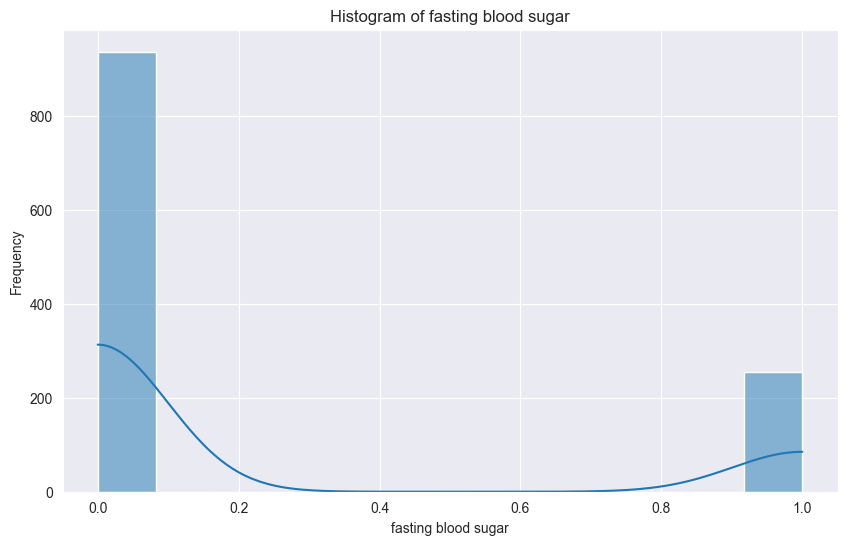

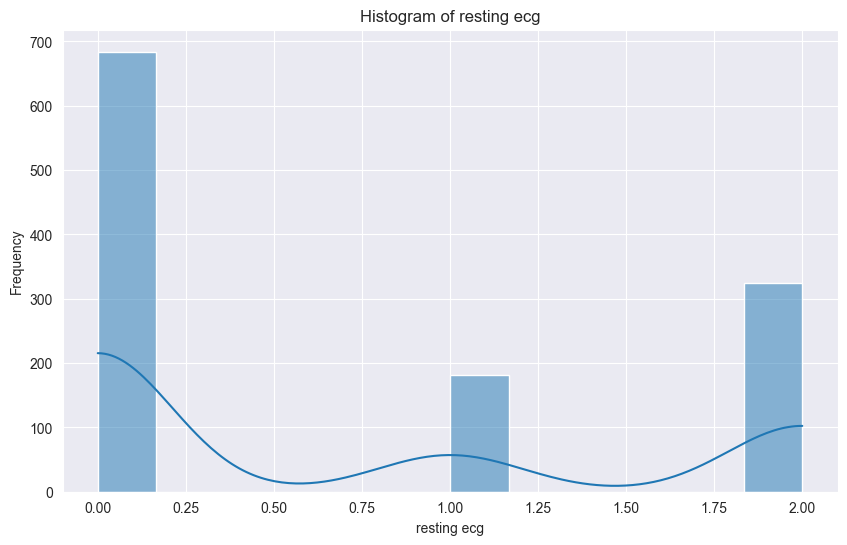

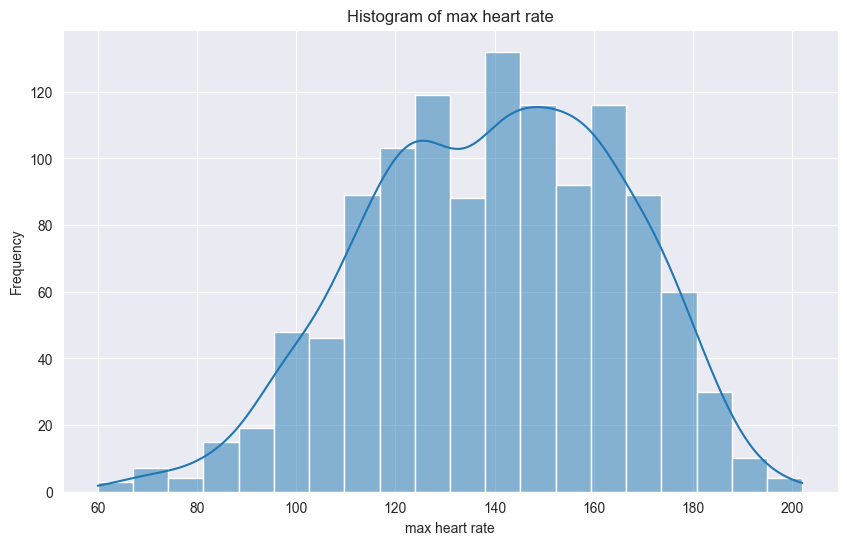

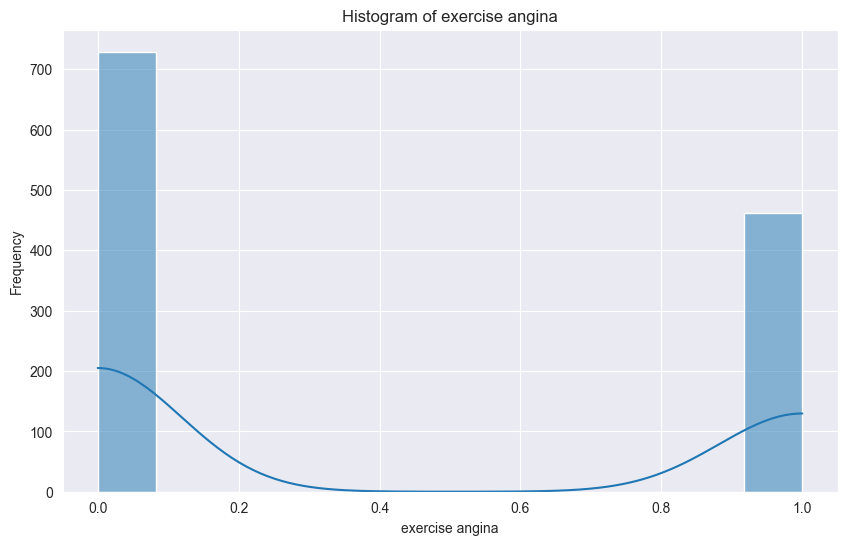

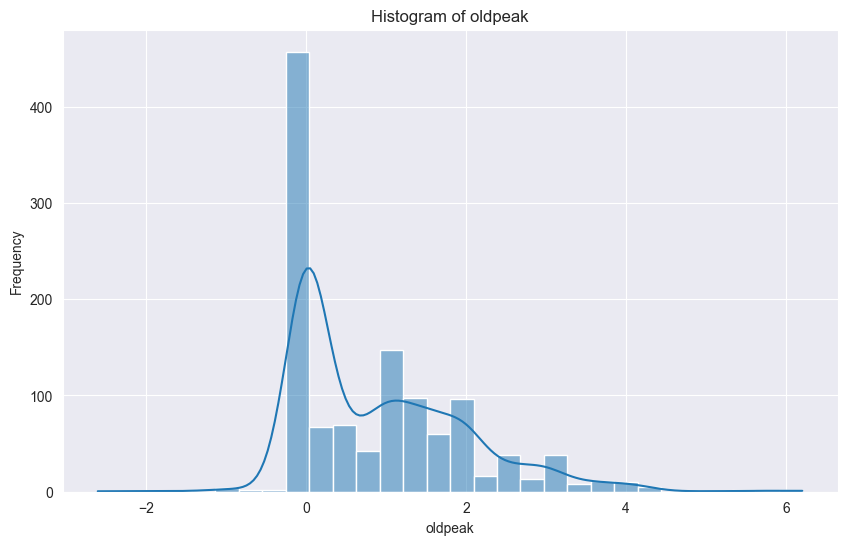

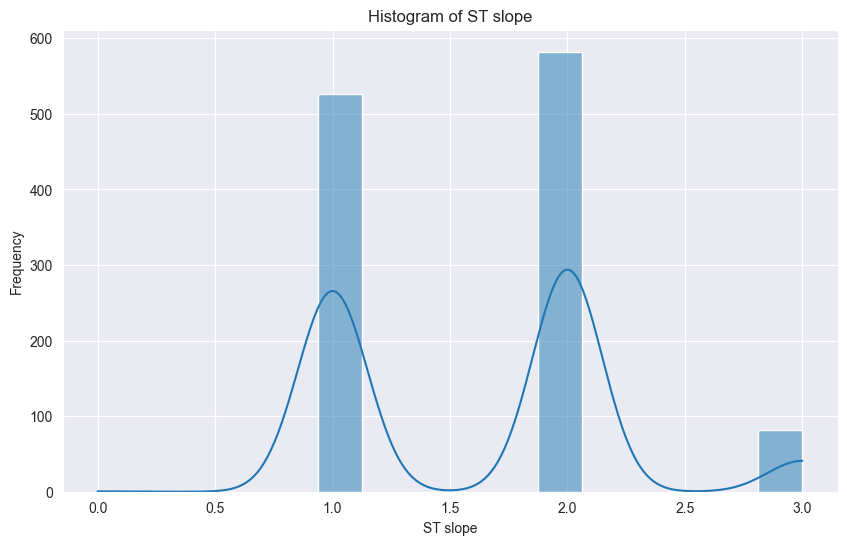

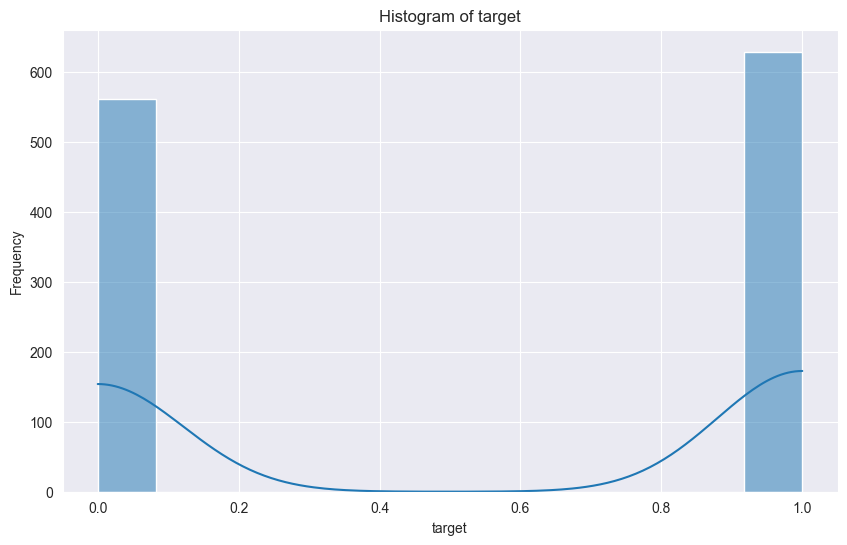

In [143]:
for column in df.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[column], kde=True)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()



As forth and last example, we can create a box plot for each numeric column.
Boxplots visualize the distribution, median, and outliers of data.

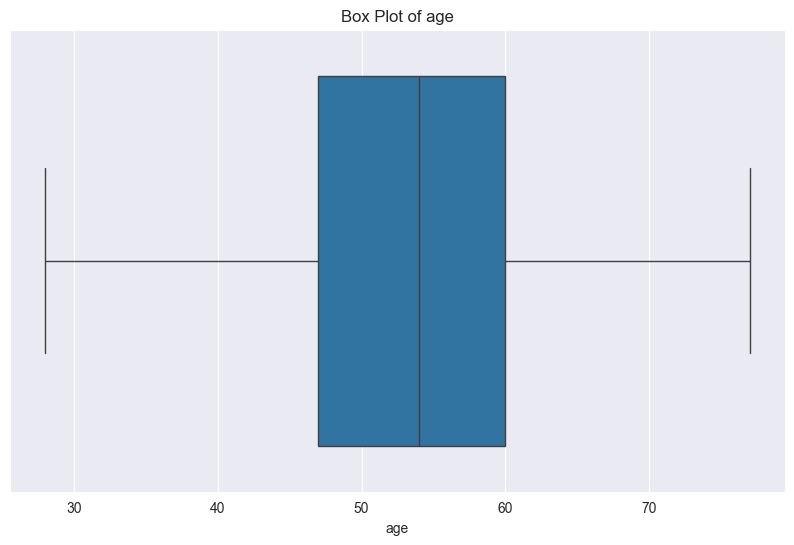

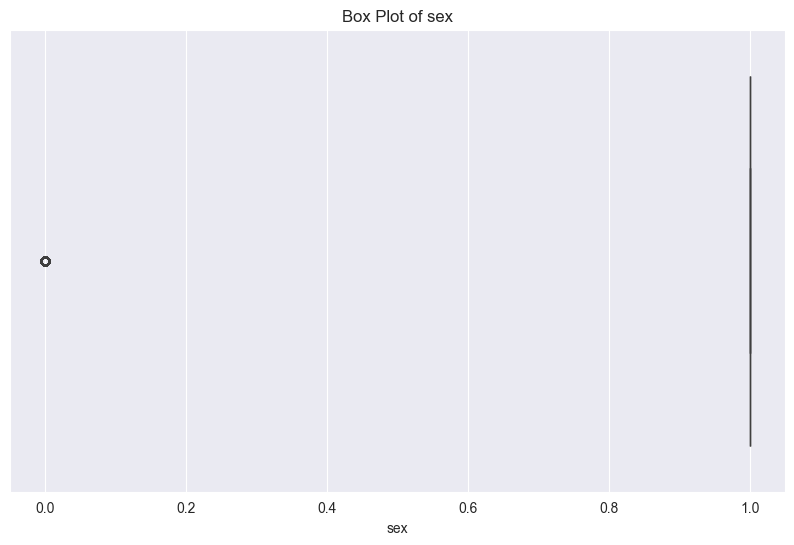

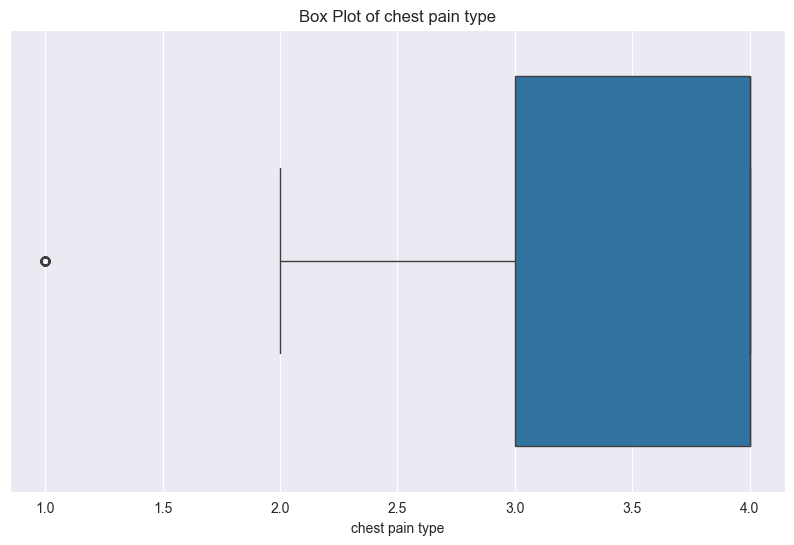

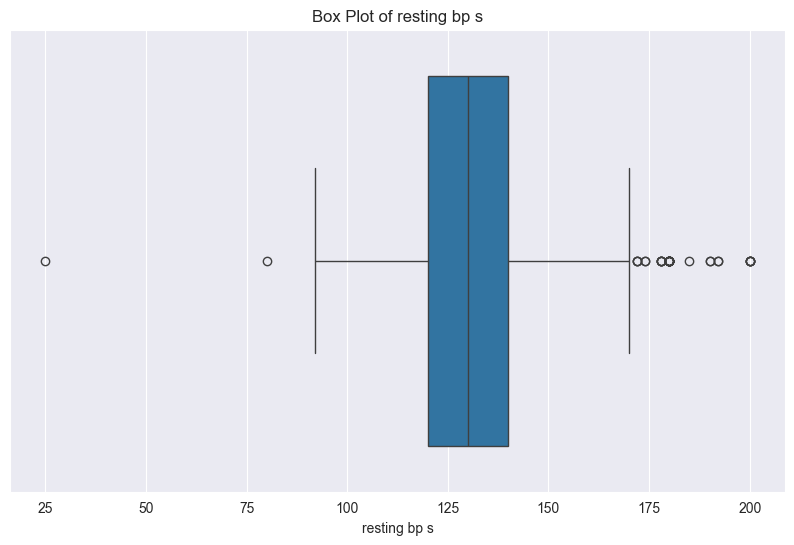

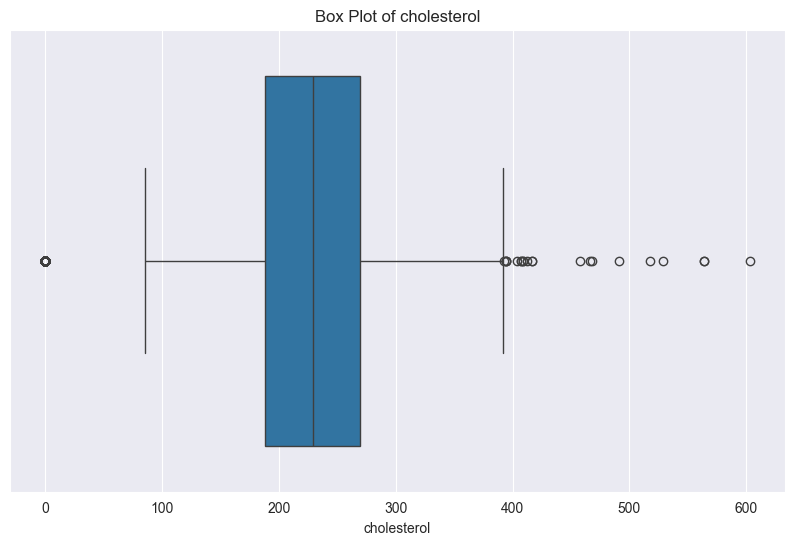

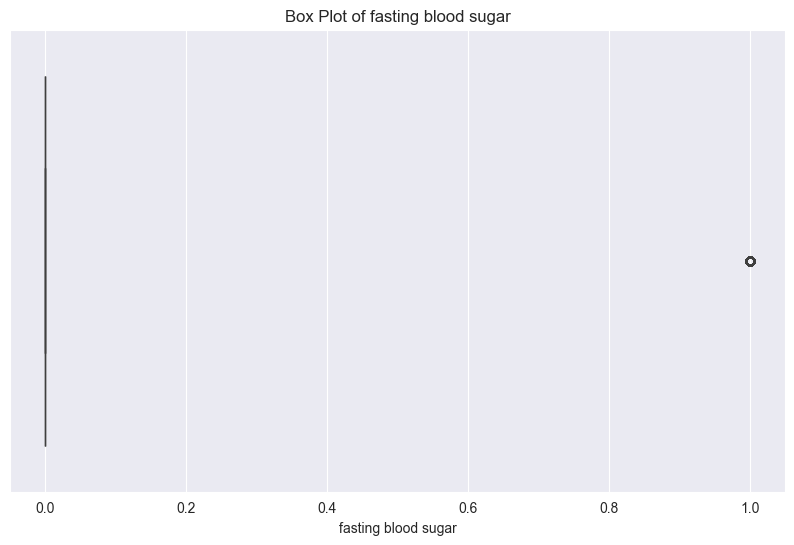

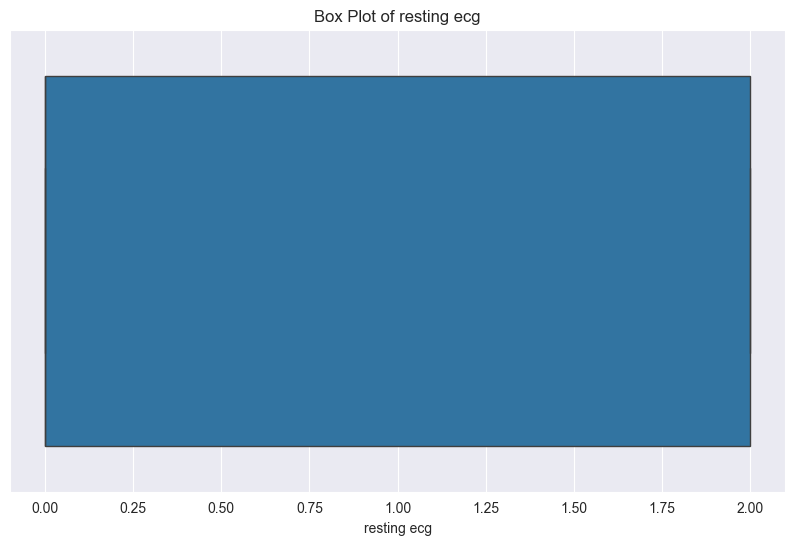

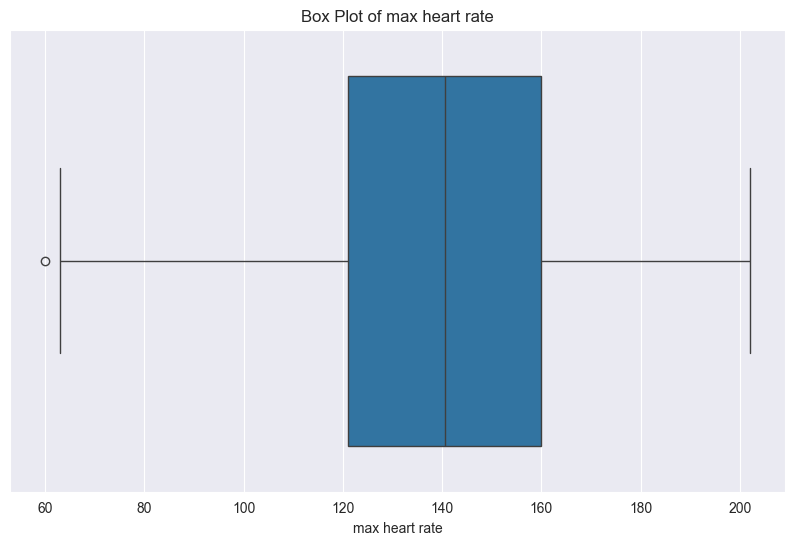

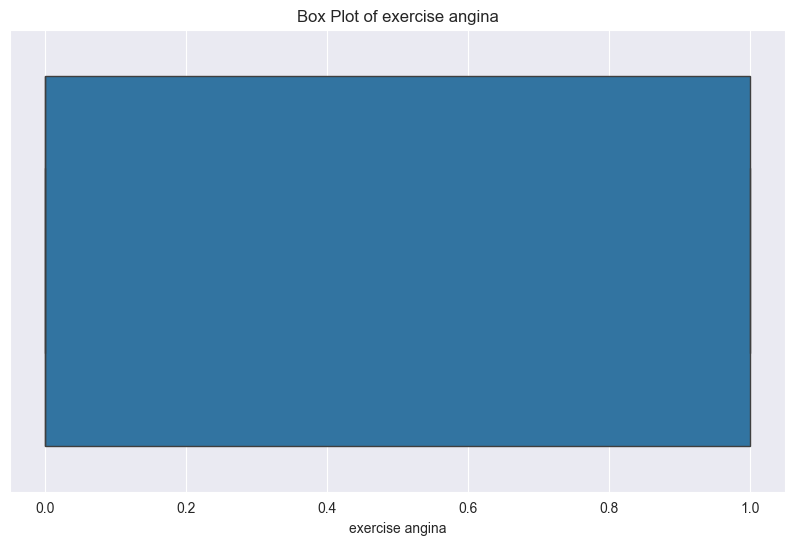

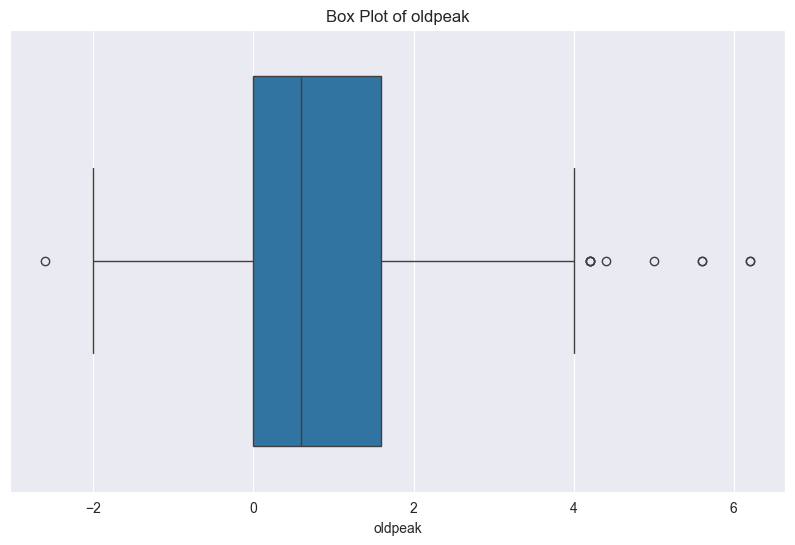

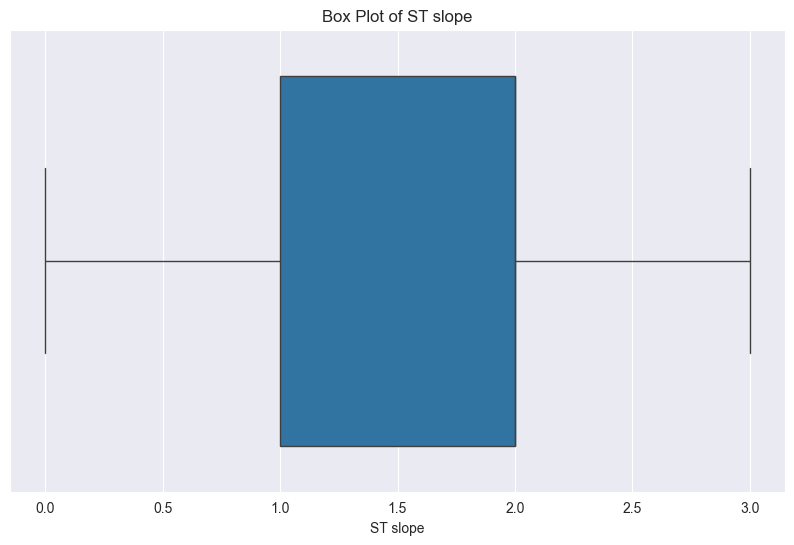

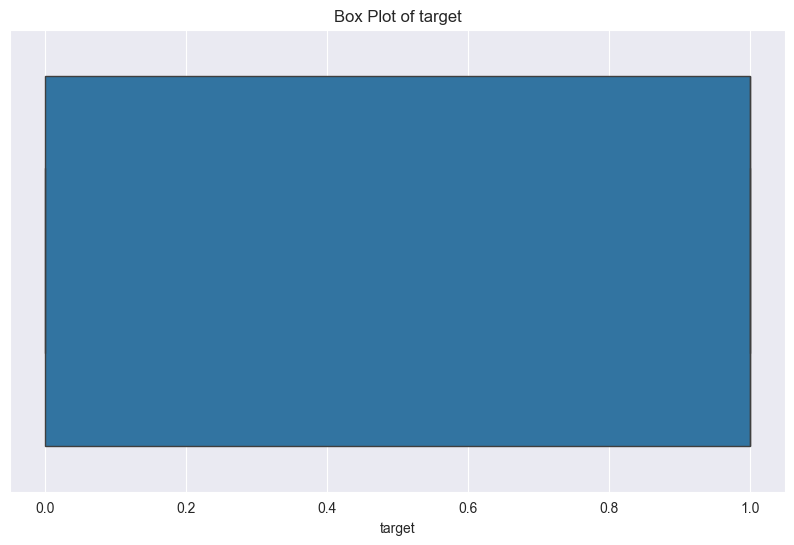

In [144]:
for column in df.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[column])
    plt.title(f'Box Plot of {column}')
    plt.xlabel(column)
    plt.show()


# Analysis of Relationships Between Variables

The analysis of relationships between variables is a critical aspect of data analysis that helps to understand how variables in a dataset interact with each other. Identifying these relationships can provide valuable insights, such as discovering patterns, making predictions, and informing decision-making processes. 

We are going to investigate those relationships with correlation matrix.

**Correlation analysis** measures the strength and direction of the linear relationship between two numerical variables. The correlation coefficient, ranging from -1 to 1, indicates:

+1: Perfect positive correlation (as one variable increases, the other increases).
-1: Perfect negative correlation (as one variable increases, the other decreases).
0: No correlation (no linear relationship between the variables).

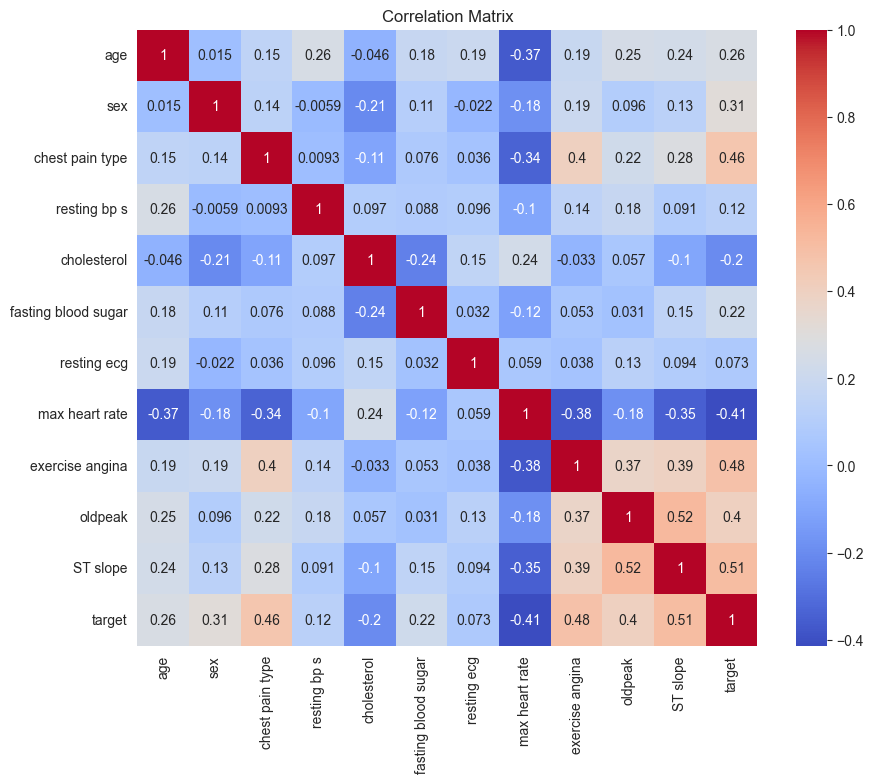

In [145]:
# Calculate correlation matrix
corr_matrix = df.corr()

# Visualize correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

The function below is designed to calculate and display the mean of a numerical column, grouped by the target variable. As example, we choose "target" column to analyse relationship between every other column.

In [149]:
def target_summary_with_num(dataframe, target, numerical_col):
    print(dataframe.groupby(target).agg({numerical_col: "mean"}), end="\n\n\n")


for col in cols:
    target_summary_with_num(df, "target", col)


          age
target       
0      51.125
1      56.035


         sex
target      
0      0.624
1      0.889


        chest pain type
target                 
0                 2.777
1                 3.639


        resting bp s
target              
0            129.793
1            134.299


        cholesterol
target             
0           231.658
1           191.372


        fasting blood sugar
target                     
0                     0.119
1                     0.297


        resting ecg
target             
0             0.631
1             0.758


        max heart rate
target                
0              150.895
1              129.777


        exercise angina
target                 
0                 0.139
1                 0.609


        oldpeak
target         
0         0.465
1         1.331


        ST slope
target          
0          1.298
1          1.916


        target
target        
0        0.000
1        1.000
